In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.tools import diff
from scipy.stats.distributions import chi2

In [2]:
import warnings
warnings.filterwarnings ('ignore')

In [3]:
data = pd.read_excel('Airlines+Data.xlsx',index_col='Month',parse_dates=True)
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [4]:
data.shape

(96, 1)

In [5]:
data.index.freq= 'MS'

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [7]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


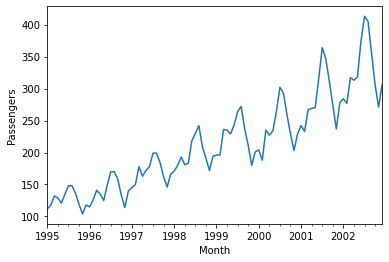

In [8]:
data['Passengers'].plot()
plt.ylabel('Passengers')
plt.show()

In [9]:
adfuller(data.Passengers)

(1.3402479596467018,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

Data is not stationary

Data includes trend and seasonality

### Triple Exponential Smoothing

In [10]:
data['Mul_Mul'] = ExponentialSmoothing(data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
data.head()

,Passengers,Mul_Mul
Month,,
1995-01-01,112,113.645946
1995-02-01,118,111.327516
1995-03-01,132,134.355786
1995-04-01,129,129.668603
1995-05-01,121,129.739658


In [11]:
data['Add_Mul'] = ExponentialSmoothing(data['Passengers'],trend='add',seasonal='mul',seasonal_periods=12).fit().fittedvalues

In [12]:
data['Mul_Add'] = ExponentialSmoothing(data['Passengers'],trend='mul',seasonal='add',seasonal_periods=12).fit().fittedvalues

In [13]:
data['Add_Add'] = ExponentialSmoothing(data['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

In [14]:
mse_1 = mean_squared_error(data['Passengers'],data['Mul_Mul'])

mse_2 = mean_squared_error(data['Passengers'],data['Add_Mul'])

mse_3 = mean_squared_error(data['Passengers'],data['Mul_Add'])

mse_4 = mean_squared_error(data['Passengers'],data['Add_Add'])

In [15]:
print(mse_1)
print(mse_2)
print(mse_3)
print(mse_4)

45.34082058247527
46.06959136931823
98.14907260172448
101.74217064862955


Model with both multiplicative trend and multiplicative seasonality is showing the best result.

In [16]:
print('RMSE = ',np.sqrt(mse_1))

RMSE =  6.733559280386211


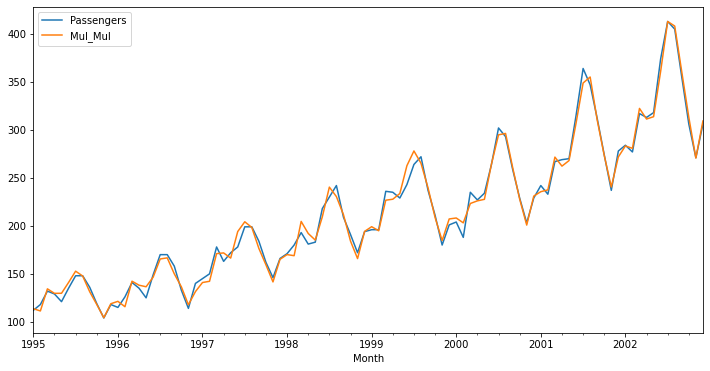

In [17]:
data[['Passengers','Mul_Mul']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

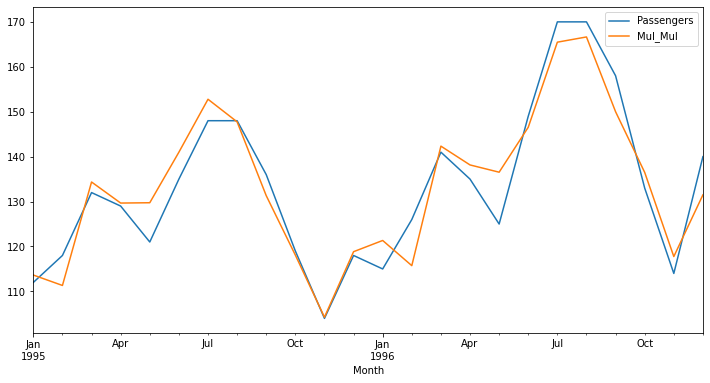

In [18]:
data[['Passengers','Mul_Mul']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [19]:
data

,Passengers,Mul_Mul,Add_Mul,Mul_Add,Add_Add
Month,,,,,
1995-01-01,112,113.645946,113.176214,111.982827,111.998411
1995-02-01,118,111.327516,111.886650,119.244937,119.931315
1995-03-01,132,134.355786,135.733331,133.245386,134.246702
1995-04-01,129,129.668603,130.698636,129.698538,130.734164
1995-05-01,121,129.739658,130.786004,122.651435,123.860175
...,...,...,...,...,...
2002-08-01,405,408.197444,406.594911,388.996433,384.892471
2002-09-01,355,360.419217,358.684868,355.597098,351.786486
2002-10-01,306,313.038780,311.278322,317.996936,314.401161


In [20]:
del data['Mul_Mul']
del data['Mul_Add']
del data['Add_Add']
del data['Add_Mul']

In [21]:
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [22]:
train_data  = data.iloc[:76]
test_data = data.iloc[76:]

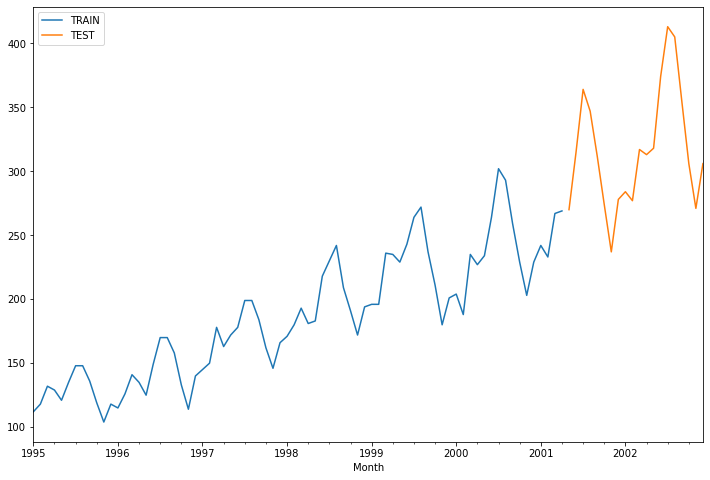

In [23]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

In [24]:
TES = ExponentialSmoothing(train_data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)
TES_fitted = TES.fit()

In [25]:
test_pred = TES_fitted.forecast(20)
test_pred

2001-05-01    265.069319
2001-06-01    294.729925
2001-07-01    326.264573
2001-08-01    328.788864
2001-09-01    292.359431
2001-10-01    258.908898
2001-11-01    227.766218
2001-12-01    258.783901
2002-01-01    265.546532
2002-02-01    264.187119
2002-03-01    307.621328
2002-04-01    299.433200
2002-05-01    298.001678
2002-06-01    331.347333
2002-07-01    366.799864
2002-08-01    369.637774
2002-09-01    328.682328
2002-10-01    291.075882
2002-11-01    256.064019
2002-12-01    290.935355
Freq: MS, dtype: float64

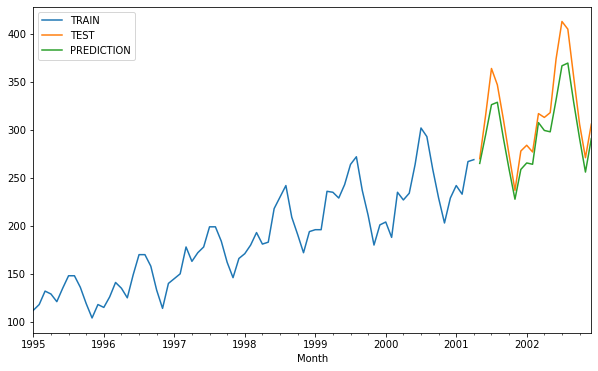

In [26]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST')
test_pred.plot(legend=True,label='PREDICTION',figsize=(10,6));

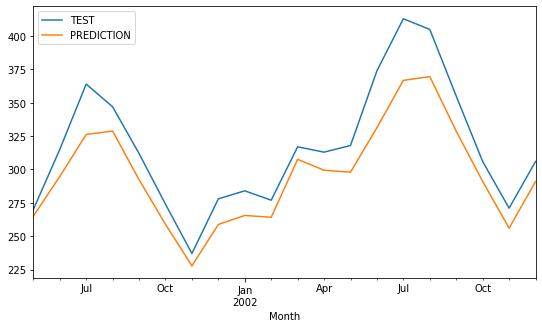

In [27]:
test_data['Passengers'].plot(legend=True,label='TEST',figsize=(9,5))
test_pred.plot(legend=True,label='PREDICTION',xlim=['2001-05-01','2002-12-01']);


### Forecsating to Future

In [28]:
TES_final = ExponentialSmoothing(data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
TES_forecast = TES_final.forecast(20)

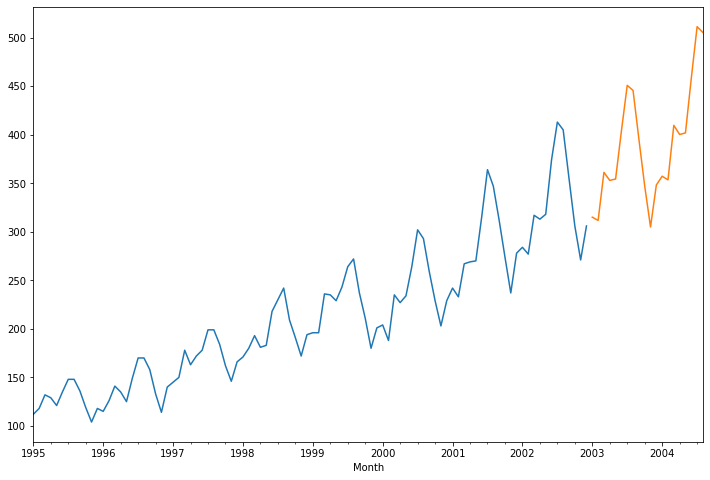

In [29]:
data['Passengers'].plot(figsize=(12,8))
TES_forecast.plot();

### RMSE 

In [30]:
TES_mse = mean_squared_error(test_data['Passengers'],test_pred)
TES_mse

550.2513310286943

In [31]:
print('TES_rmse = ',np.sqrt(TES_mse))

TES_rmse =  23.45743658264249


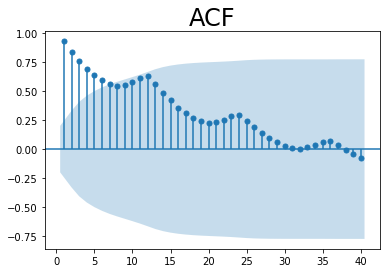

In [32]:
sgt.plot_acf(data.Passengers,lags=40,zero=False)
plt.title("ACF", size=24)
plt.show()

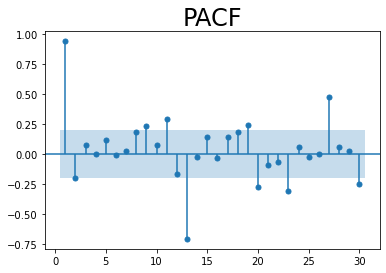

In [33]:
sgt.plot_pacf(data.Passengers,lags=30,zero=False)
plt.title("PACF", size=24)
plt.show()

### LLR Test

In [34]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

### AR model

In [35]:
ar_1 = ARMA(data['Passengers'],order=(1,0))
results_ar1 = ar_1.fit()

In [36]:
 results_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   96
Model:                     ARMA(1, 0)   Log Likelihood                -438.831
Method:                       css-mle   S.D. of innovations             23.098
Date:                Tue, 16 Aug 2022   AIC                            883.661
Time:                        11:55:51   BIC                            891.354
Sample:                    01-01-1995   HQIC                           886.771
                         - 12-01-2002                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              212.3020     42.366      5.011      0.000     129.266     295.339
ar.L1.Passengers     0.9534      0.030     31.820      0.000       0.895       1.012
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0489           +0.0000j            1.0489            0.0000
-----------------------------------------------------------------------------
"""

In [37]:
ar_2 = ARMA(data.Passengers,order=(2,0))
results_ar2 = ar_2.fit()

In [38]:
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   96
Model:                     ARMA(2, 0)   Log Likelihood                -434.852
Method:                       css-mle   S.D. of innovations             22.144
Date:                Tue, 16 Aug 2022   AIC                            877.704
Time:                        11:55:52   BIC                            887.961
Sample:                    01-01-1995   HQIC                           881.850
                         - 12-01-2002                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              214.0091     33.016      6.482      0.000     149.299     278.719
ar.L1.Passengers     1.2246      0.098     12.463      0.000       1.032       1.417
ar.L2.Passengers    -0.2866      0.099     -2.886      0.004      -0.481      -0.092
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0996           +0.0000j            1.0996            0.0000
AR.2            3.1730           +0.0000j            3.1730            0.0000
-----------------------------------------------------------------------------
"""

In [39]:
LLR_test(ar_1,ar_2)

0.005

Reject null hypothesis. Therefore ar_2 is a better model than ar_1

In [40]:
ar_3 = ARMA(data.Passengers,order=(3,0))
results_ar3 = ar_3.fit()

In [41]:
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   96
Model:                     ARMA(3, 0)   Log Likelihood                -432.832
Method:                       css-mle   S.D. of innovations             21.662
Date:                Tue, 16 Aug 2022   AIC                            875.665
Time:                        11:55:52   BIC                            888.486
Sample:                    01-01-1995   HQIC                           880.847
                         - 12-01-2002                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              214.7317     40.411      5.314      0.000     135.528     293.936
ar.L1.Passengers     1.2914      0.102     12.699      0.000       1.092       1.491
ar.L2.Passengers    -0.5490      0.161     -3.400      0.001      -0.866      -0.233
ar.L3.Passengers     0.2108      0.104      2.036      0.042       0.008       0.414
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0563           -0.0000j            1.0563           -0.0000
AR.2            0.7741           -1.9727j            2.1192           -0.1905
AR.3            0.7741           +1.9727j            2.1192            0.1905
-----------------------------------------------------------------------------
"""

In [42]:
LLR_test(ar_2,ar_3)

0.044

Reject null hypothesis. Therefore ar_3 is a better model than ar_2.

In [43]:
ar_4 = ARMA(data.Passengers,order = (4,0))
results_ar4 = ar_4.fit()
results_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   96
Model:                     ARMA(4, 0)   Log Likelihood                -432.603
Method:                       css-mle   S.D. of innovations             21.604
Date:                Tue, 16 Aug 2022   AIC                            877.206
Time:                        11:55:53   BIC                            892.592
Sample:                    01-01-1995   HQIC                           883.425
                         - 12-01-2002                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              215.3259     43.710      4.926      0.000     129.657     300.995
ar.L1.Passengers     1.2794      0.103     12.434      0.000       1.078       1.481
ar.L2.Passengers    -0.5129      0.170     -3.025      0.002      -0.845      -0.181
ar.L3.Passengers     0.1189      0.170      0.698      0.485      -0.215       0.453
ar.L4.Passengers     0.0725      0.107      0.679      0.497      -0.137       0.282
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0459           -0.0000j            1.0459           -0.0000
AR.2            0.8361           -1.5251j            1.7393           -0.1702
AR.3            0.8361           +1.5251j            1.7393            0.1702
AR.4           -4.3581           -0.0000j            4.3581           -0.5000
-----------------------------------------------------------------------------
"""

In [44]:
LLR_test(ar_3,ar_4)

0.498

Fail to reject the null hypothesis.
 There is no improvement from ar_3 to ar_4

#### AR(3) Model

In [45]:
model_ar3 = ARMA(train_data.Passengers,order=(3,0))
model_ar3_fitted = model_ar3.fit()

In [46]:
(train_data.shape,
test_data.shape)

((76, 1), (20, 1))

In [47]:
ar3_test_pred = model_ar3_fitted.predict(76,95)
ar3_test_pred

2001-05-01    259.393320
2001-06-01    251.977083
2001-07-01    247.069285
2001-08-01    242.782113
2001-09-01    238.606080
2001-10-01    234.663096
2001-11-01    231.030508
2001-12-01    227.688529
2002-01-01    224.602623
2002-02-01    221.749883
2002-03-01    219.113520
2002-04-01    216.677775
2002-05-01    214.427416
2002-06-01    212.348251
2002-07-01    210.427232
2002-08-01    208.652337
2002-09-01    207.012454
2002-10-01    205.497315
2002-11-01    204.097428
2002-12-01    202.804028
Freq: MS, dtype: float64

In [48]:
ar3_pred_df = pd.DataFrame(ar3_test_pred,columns=test_data.columns)
ar3_pred_df

,Passengers
2001-05-01,259.393320
2001-06-01,251.977083
2001-07-01,247.069285
2001-08-01,242.782113
2001-09-01,238.606080
2001-10-01,234.663096
2001-11-01,231.030508
2001-12-01,227.688529
2002-01-01,224.602623
2002-02-01,221.749883


In [49]:
mse_ar3 = mean_squared_error(test_data.Passengers,ar3_pred_df.Passengers)
mse_ar3

11356.65056071769

In [50]:
print("RMSE = ",np.round(np.sqrt(mse_ar3),2))

RMSE =  106.57


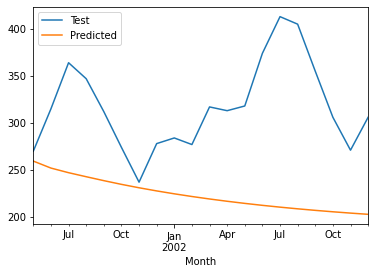

In [51]:
test_data['Passengers'].plot(legend=True,label='Test')
ar3_pred_df['Passengers'].plot(legend = True,label = 'Predicted');

### MA Model

In [52]:
ma_1 = ARMA(data.Passengers[1:],order=(0,1))
results_ma1 = ma_1.fit()
results_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   95
Model:                     ARMA(0, 1)   Log Likelihood                -485.034
Method:                       css-mle   S.D. of innovations             39.314
Date:                Tue, 16 Aug 2022   AIC                            976.068
Time:                        11:55:54   BIC                            983.730
Sample:                    02-01-1995   HQIC                           979.164
                         - 12-01-2002                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              215.1088      7.911     27.190      0.000     199.603     230.615
ma.L1.Passengers     0.9714      0.035     27.471      0.000       0.902       1.041
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0295           +0.0000j            1.0295            0.5000
-----------------------------------------------------------------------------
"""

In [53]:
ma_4 =ARMA(data.Passengers[1:],order=[0,4])
results_ma4 = ma_4.fit()
results_ma4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   95
Model:                     ARMA(0, 4)   Log Likelihood                -437.106
Method:                       css-mle   S.D. of innovations             23.419
Date:                Tue, 16 Aug 2022   AIC                            886.212
Time:                        11:55:55   BIC                            901.535
Sample:                    02-01-1995   HQIC                           892.404
                         - 12-01-2002                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              214.8703     13.448     15.977      0.000     188.512     241.229
ma.L1.Passengers     1.5781      0.109     14.427      0.000       1.364       1.793
ma.L2.Passengers     1.6431      0.177      9.279      0.000       1.296       1.990
ma.L3.Passengers     1.2133      0.178      6.817      0.000       0.864       1.562
ma.L4.Passengers     0.2593      0.128      2.034      0.042       0.009       0.509
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.2002           -1.0256j            1.0450           -0.2807
MA.2           -0.2002           +1.0256j            1.0450            0.2807
MA.3           -1.1171           -0.0000j            1.1171           -0.5000
MA.4           -3.1608           -0.0000j            3.1608           -0.5000
-----------------------------------------------------------------------------
"""

#### MA(7) Model

In [54]:
model_ma7 = ARMA(train_data.Passengers,order=(0,7))
model_ma7_fitted = model_ma7.fit()

In [55]:
ma7_test_pred = model_ma7_fitted.predict(76,95)

In [56]:
ma7_pred_df = pd.DataFrame(ma7_test_pred,columns=test_data.columns)
ma7_pred_df

,Passengers
2001-05-01,269.496181
2001-06-01,269.092270
2001-07-01,267.172910
2001-08-01,237.187018
2001-09-01,197.687144
2001-10-01,179.226773
2001-11-01,173.539920
2001-12-01,186.720578
2002-01-01,186.720578
2002-02-01,186.720578


In [57]:
mse_ma7 = mean_squared_error(test_data.Passengers,ma7_pred_df.Passengers)
mse_ma7

16175.791743462829

In [58]:
print("RMSE = ",np.round(np.sqrt(mse_ma7),2))

RMSE =  127.18


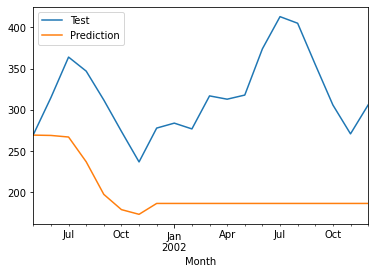

In [59]:
test_data.Passengers.plot(legend = True,label = 'Test')
ma7_pred_df.Passengers.plot(legend = True, label= 'Prediction');

### ARIMA Model

In [60]:
data['d1'] = diff(data['Passengers'],k_diff=1)

In [61]:
data

,Passengers,d1
Month,,
1995-01-01,112,NaN
1995-02-01,118,6.0
1995-03-01,132,14.0
1995-04-01,129,-3.0
1995-05-01,121,-8.0
...,...,...
2002-08-01,405,-8.0
2002-09-01,355,-50.0
2002-10-01,306,-49.0


In [62]:
adfuller(data['d1'].iloc[1:])

(-2.1500017359206556,
 0.2248894264751249,
 12,
 82,
 {'1%': -3.512738056978279,
  '5%': -2.8974898650628984,
  '10%': -2.585948732897085},
 613.1127223022611)

Fail to reject null hypothesis

Data is still stationary

<AxesSubplot:xlabel='Month'>

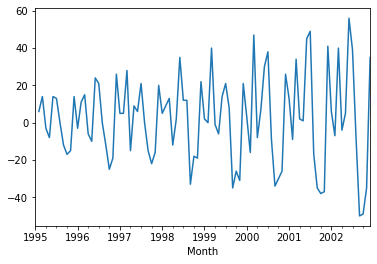

In [63]:
data.d1.plot()

In [64]:
data['d2'] = diff(data['Passengers'],k_diff=2)
data

,Passengers,d1,d2
Month,,,
1995-01-01,112,NaN,NaN
1995-02-01,118,6.0,NaN
1995-03-01,132,14.0,8.0
1995-04-01,129,-3.0,-17.0
1995-05-01,121,-8.0,-5.0
...,...,...,...
2002-08-01,405,-8.0,-47.0
2002-09-01,355,-50.0,-42.0
2002-10-01,306,-49.0,1.0


In [65]:
adfuller(data['d2'].iloc[2:])

(-11.547980944840818,
 3.503180236321031e-21,
 11,
 82,
 {'1%': -3.512738056978279,
  '5%': -2.8974898650628984,
  '10%': -2.585948732897085},
 610.29507661304)

Reject null hypothesis

Data is stationary

<AxesSubplot:xlabel='Month'>

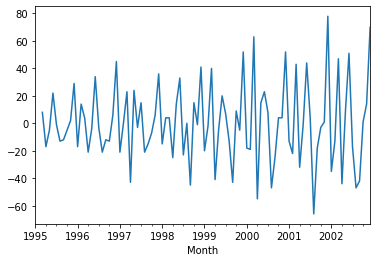

In [66]:
data.d2.plot()

In [67]:
model_1 = ARIMA(data['Passengers'],order=(3,2,6))
result_1 = model_1.fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D2.Passengers   No. Observations:                   94
Model:                 ARIMA(3, 2, 6)   Log Likelihood                -408.935
Method:                       css-mle   S.D. of innovations             17.233
Date:                Tue, 16 Aug 2022   AIC                            839.871
Time:                        11:55:59   BIC                            867.847
Sample:                    03-01-1995   HQIC                           851.171
                         - 12-01-2002                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0198      0.014      1.441      0.150      -0.007       0.047
ar.L1.D2.Passengers    -0.1571      0.493     -0.319      0.750      -1.123       0.808
ar.L2.D2.Passengers    -0.4837      0.124     -3.912      0.000      -0.726      -0.241
ar.L3.D2.Passengers     0.1191      0.243      0.490      0.624      -0.357       0.595
ma.L1.D2.Passengers    -0.7043      1.127     -0.625      0.532      -2.913       1.504
ma.L2.D2.Passengers    -0.1214      4.278     -0.028      0.977      -8.505       8.262
ma.L3.D2.Passengers    -0.6713      6.532     -0.103      0.918     -13.474      12.131
ma.L4.D2.Passengers    -0.3356      3.130     -0.107      0.915      -6.469       5.798
ma.L5.D2.Passengers     0.7258      3.779      0.192      0.848      -6.680       8.132
ma.L6.D2.Passengers     0.1166      0.746      0.156      0.876      -1.345       1.578
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.3283           -1.2929j            1.3340           -0.2896
AR.2           -0.3283           +1.2929j            1.3340            0.2896
AR.3            4.7178           -0.0000j            4.7178           -0.0000
MA.1            0.9990           -0.0447j            1.0000           -0.0071
MA.2            0.9990           +0.0447j            1.0000            0.0071
MA.3           -0.1896           -0.9819j            1.0000           -0.2804
MA.4           -0.1896           +0.9819j            1.0000            0.2804
MA.5           -1.3134           -0.0000j            1.3134           -0.5000
MA.6           -6.5305           -0.0000j            6.5305           -0.5000
-----------------------------------------------------------------------------
"""

In [68]:
model_2 = ARIMA(data.Passengers,order=(3,2,5))
result_2 = model_2.fit()

In [69]:
LLR_test(model_1,model_2)

1.0

### ARIMA(3,2,1)

In [90]:
model_arima_325 = ARIMA(train_data.Passengers,order=(3,2,1))
arima_325_fitted = model_arima_325.fit()
arima_325_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D2.Passengers   No. Observations:                   74
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -323.195
Method:                       css-mle   S.D. of innovations             18.498
Date:                Tue, 16 Aug 2022   AIC                            658.390
Time:                        12:30:16   BIC                            672.214
Sample:                    03-01-1995   HQIC                           663.905
                         - 04-01-2001                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0046      0.093      0.049      0.961      -0.177       0.187
ar.L1.D2.Passengers     0.1711      0.116      1.479      0.139      -0.056       0.398
ar.L2.D2.Passengers    -0.1427      0.117     -1.217      0.224      -0.373       0.087
ar.L3.D2.Passengers    -0.1082      0.117     -0.925      0.355      -0.338       0.121
ma.L1.D2.Passengers    -1.0000      0.035    -28.598      0.000      -1.069      -0.931
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8069           -1.5813j            1.7753           -0.1749
AR.2            0.8069           +1.5813j            1.7753            0.1749
AR.3           -2.9327           -0.0000j            2.9327           -0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [122]:
arima_325_pred = arima_325_fitted.predict(76,95,typ = 'levels')
arima_325_pred

2001-05-01    267.864386
2001-06-01    266.111402
2001-07-01    268.167497
2001-08-01    271.307561
2001-09-01    274.161256
2001-10-01    276.404109
2001-11-01    278.471009
2001-12-01    280.630923
2002-01-01    282.902912
2002-02-01    285.204800
2002-03-01    287.490710
2002-04-01    289.762454
2002-05-01    292.035784
2002-06-01    294.318097
2002-07-01    296.608216
2002-08-01    298.903180
2002-09-01    301.201848
2002-10-01    303.504578
2002-11-01    305.811911
2002-12-01    308.124014
Freq: MS, dtype: float64

In [123]:
mse_arima_321 = mean_squared_error(arima_325_pred, test_data.Passengers)

In [124]:
print(f'RMSE = ',np.round(np.sqrt(mse_arima_321),2))

RMSE =  53.8


In [74]:
arima_325_df = pd.DataFrame(arima_325_pred,columns=test_data.columns)
arima_325_df

,Passengers
2001-05-01,267.864386
2001-06-01,266.111402
2001-07-01,268.167497
2001-08-01,271.307561
2001-09-01,274.161256
2001-10-01,276.404109
2001-11-01,278.471009
2001-12-01,280.630923
2002-01-01,282.902912
2002-02-01,285.204800


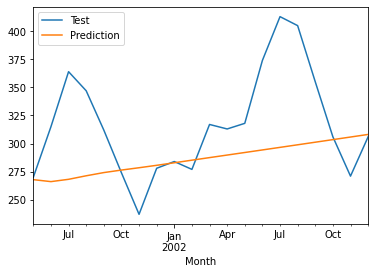

In [75]:
test_data.Passengers.plot(legend = True, label = 'Test')
arima_325_df.Passengers.plot(legend = True, label = 'Prediction');

In [77]:
df = pd.DataFrame()
df['test'] = arima_325_df['Passengers']
df['pred'] = test_data['Passengers']

In [78]:
df

,test,pred
2001-05-01,267.864386,270
2001-06-01,266.111402,315
2001-07-01,268.167497,364
2001-08-01,271.307561,347
2001-09-01,274.161256,312
2001-10-01,276.404109,274
2001-11-01,278.471009,237
2001-12-01,280.630923,278
2002-01-01,282.902912,284
2002-02-01,285.204800,277


### Forecasting into the future

In [92]:
model = ARIMA(data.Passengers,order = (3,2,1))
model_fit = model.fit()

In [104]:
fcast = model_fit.predict(len(data),len(data)+20,typ='levels').rename('ARIMA(3,2,1) Forecast')
fcast

2003-01-01    331.408216
2003-02-01    337.641705
2003-03-01    332.785211
2003-04-01    329.606161
2003-05-01    331.284314
2003-06-01    335.248865
2003-07-01    338.716040
2003-08-01    341.050017
2003-09-01    342.912873
2003-10-01    344.930383
2003-11-01    347.219463
2003-12-01    349.614601
2004-01-01    351.975539
2004-02-01    354.282353
2004-03-01    356.575836
2004-04-01    358.887222
2004-05-01    361.219482
2004-06-01    363.562674
2004-07-01    365.909892
2004-08-01    368.260823
2004-09-01    370.617866
Freq: MS, Name: ARIMA(3,2,1) Forecast, dtype: float64

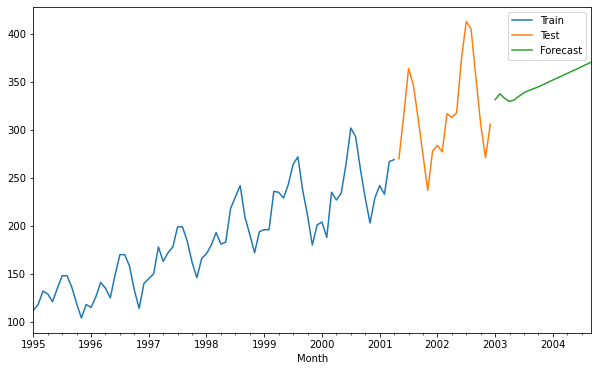

In [130]:
train_data['Passengers'].plot(legend = True, label = 'Train')
test_data['Passengers'].plot(legend = True, label = 'Test')
fcast.plot(legend=True, label='Forecast',figsize= (10,6));

**The rmse value of triple exponential smoothing model with multiplicative trend and multiplicative seasonality is the least among above models.<br>So it is the best model for forecasting.**